***

## ML实战 第二课实训

####  实训提交说明：
- 位置：实训文件统一放置于/0.Teacher/Exercise/ML实战/2/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。
***

实训要求，请完成【填空部分的内容】，其他部分代码可以直接运行。

In [1]:
import os
import sys
import operator
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Two Simgma实训

## 步骤：下载数据集

如果wget无法下载，请自行下载。

In [ ]:
!wget https://cdn.coggle.club/kaggle/two-sigma-connect-rental-listing-inquiries.zip

In [ ]:
!unzip two-sigma-connect-rental-listing-inquiries.zip

## 步骤：加载数据集

In [2]:
import pandas as pd
train_df = pd.read_json('train.json.zip', compression='zip')

FileNotFoundError: [Errno 2] No such file or directory: 'train.json.zip'

<font color='red'> **0、【完成测试集读取，命名为test_df】** </font>

In [ ]:
# 在这里，填写你的回答


## 步骤：数据统计

In [ ]:
train_df.head(3)

屏幕快照 2020-10-14 下午10.26.53.png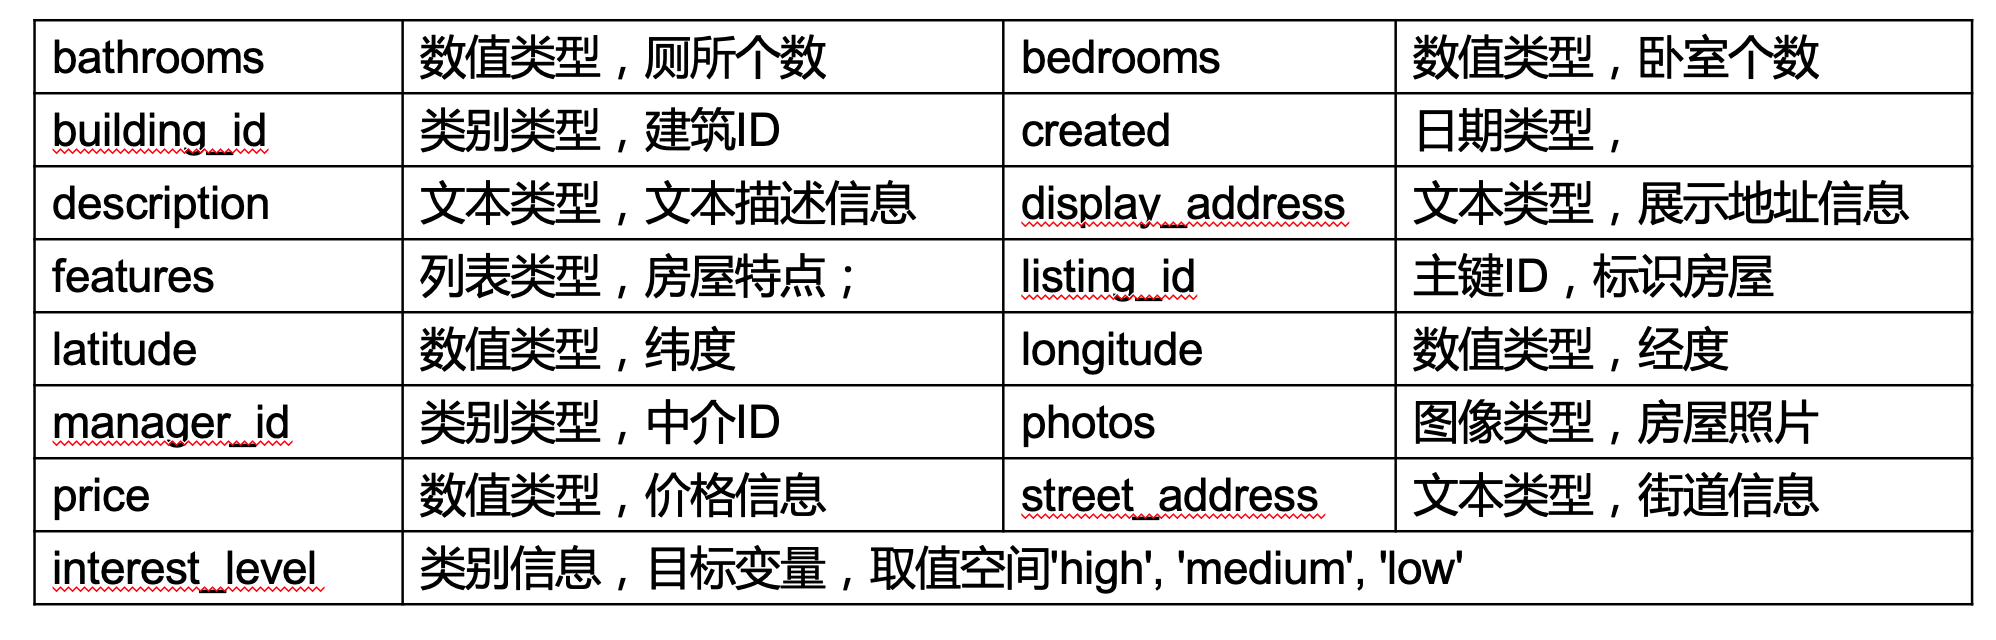

<font color='red'> **【特征提取步骤】** </font>

<font color='red'> **1、【统计训练集、测试集中所有房间个数，bedrooms与bathroom之和】，新增一列特征命名为numrooms** </font>

In [ ]:
# 在这里，填写你的回答


In [ ]:
train_df["num_photos"] = train_df["photos"].apply(len)
test_df["num_photos"] = test_df["photos"].apply(len)

train_df = train_df.drop('photos', axis=1)
test_df = test_df.drop('photos', axis=1)

<font color='red'> **2、【统计训练集、测试集中features个数】，新增一列特征命名为num_features，并删除原始features列。** </font>

In [ ]:
# 在这里，填写你的回答


In [ ]:
# 统计description中单词个数


<font color='red'> **3、【统计训练集、测试集中description不重复单词个数】，并删除原始description列。** </font>

In [ ]:
# 在这里，填写你的回答



In [ ]:
# convert the created column to datetime object so as to extract more features 
train_df["created"] = pd.to_datetime(train_df["created"])
test_df["created"] = pd.to_datetime(test_df["created"])

# Let us extract some features like year, month, day, hour from date columns #
train_df["created_year"] = train_df["created"].dt.year
test_df["created_year"] = test_df["created"].dt.year
train_df["created_month"] = train_df["created"].dt.month
test_df["created_month"] = test_df["created"].dt.month
train_df["created_day"] = train_df["created"].dt.day
test_df["created_day"] = test_df["created"].dt.day
train_df["created_hour"] = train_df["created"].dt.hour
test_df["created_hour"] = test_df["created"].dt.hour

train_df = train_df.drop('created', axis=1)
test_df = test_df.drop('created', axis=1)

<font color='red'> **4、【对manager_id进行count encode】，新增一列为manager_count** </font>

In [ ]:
# 在这里，填写你的回答


In [ ]:
# 对display_address进行编码


<font color='red'> **5、【参考上面的编码方式，将其他类别（building_id，manager_id，street_address）字段进行编码】** </font>

In [ ]:
# 在这里，填写你的回答


## 模型训练

In [ ]:
train_X = train_df.drop(['listing_id', 'interest_level'], axis=1).values

target_num_map = {'high':0, 'medium':1, 'low':2}
train_y = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))

<font color='red'> **5、【使用树模型完成交叉验证】** </font>

In [ ]:
cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(train_X.shape[0])):
        dev_X, val_X = train_X[dev_index,:], train_X[val_index,:]
        dev_y, val_y = train_y[dev_index], train_y[val_index]
        
        # 在此处作答
        
        cv_scores.append(log_loss(val_y, preds))
        print(cv_scores)
        break